In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
# Create a dir to generated images
outputdir = "./images_analysis"
os.makedirs(outputdir, exist_ok=True)


In [3]:
# Loading csv
file_path = "info.csv"
df = pd.read_csv(file_path)


In [4]:
# Converting timestamp to legible datetime
df["Date_from_timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")

# Creating new columns from datetime
df["Data"] = df["Date_from_timestamp"].dt.date
df["Hora"] = df["Date_from_timestamp"].dt.hour
df["Ano"] = df["Date_from_timestamp"].dt.year
df["Mes"] = df["Date_from_timestamp"].dt.month
df["Dia"] = df["Date_from_timestamp"].dt.day


/tmp/ipykernel_4202/3232289316.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


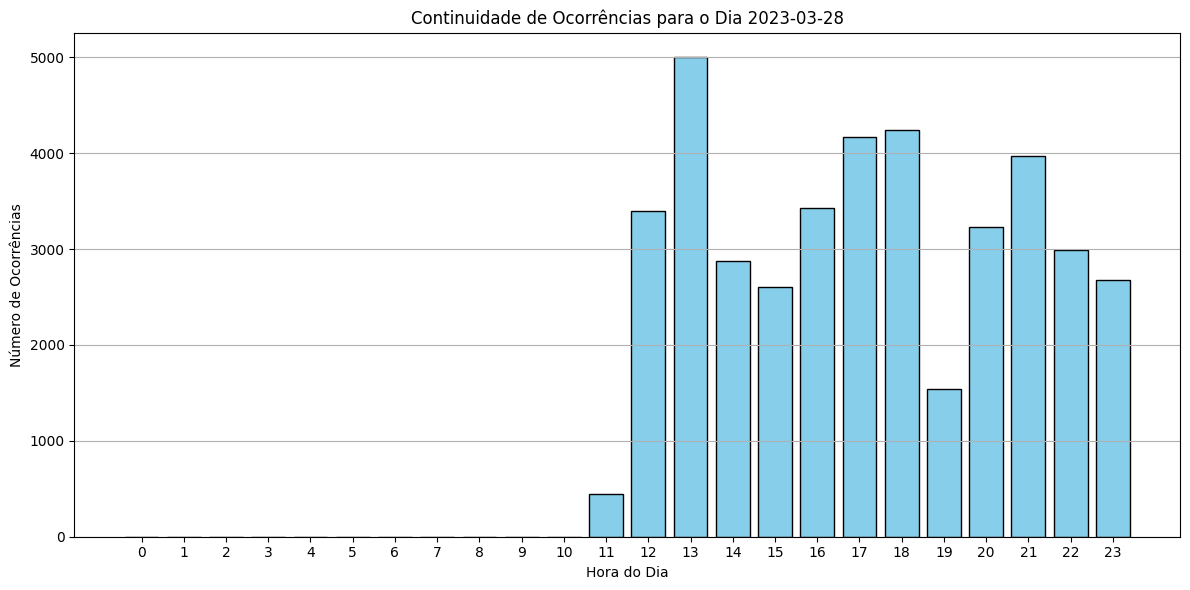

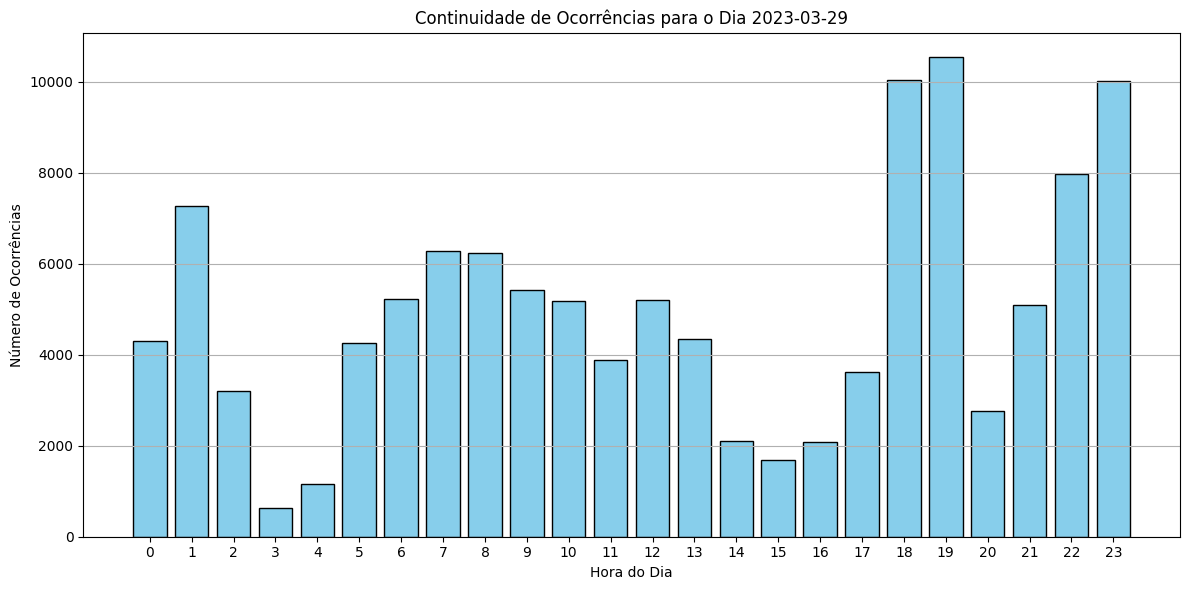

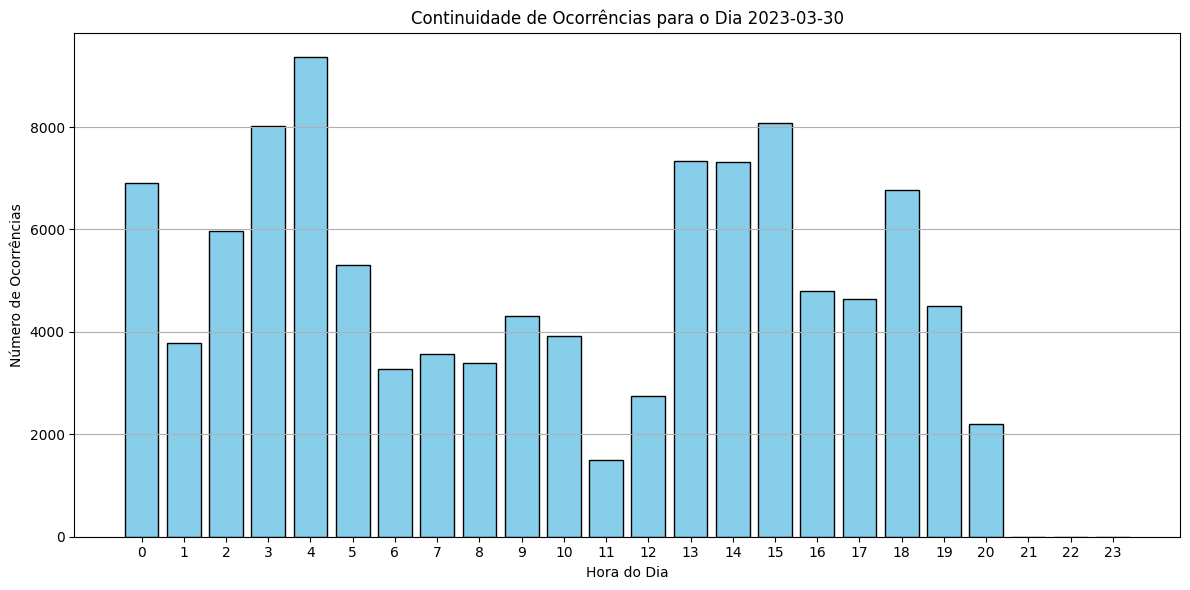

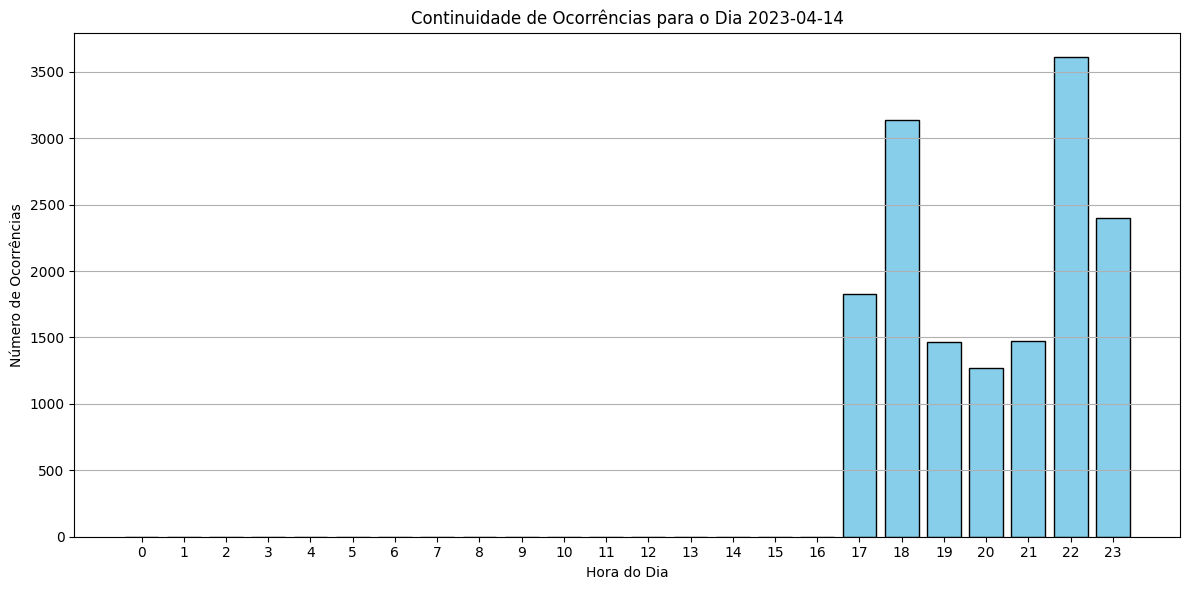

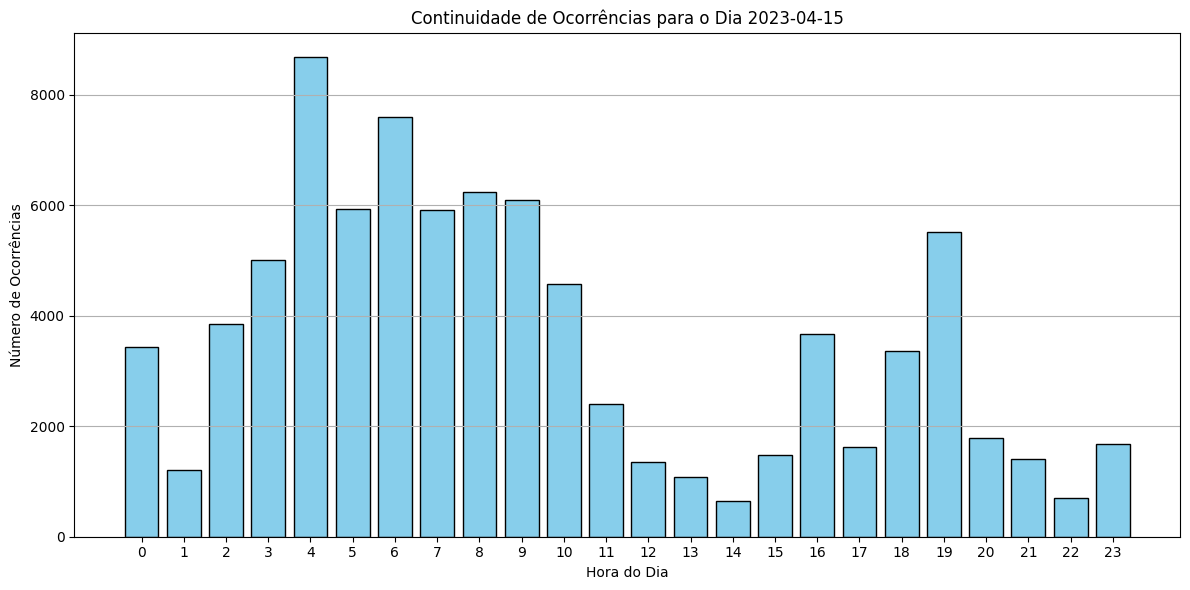

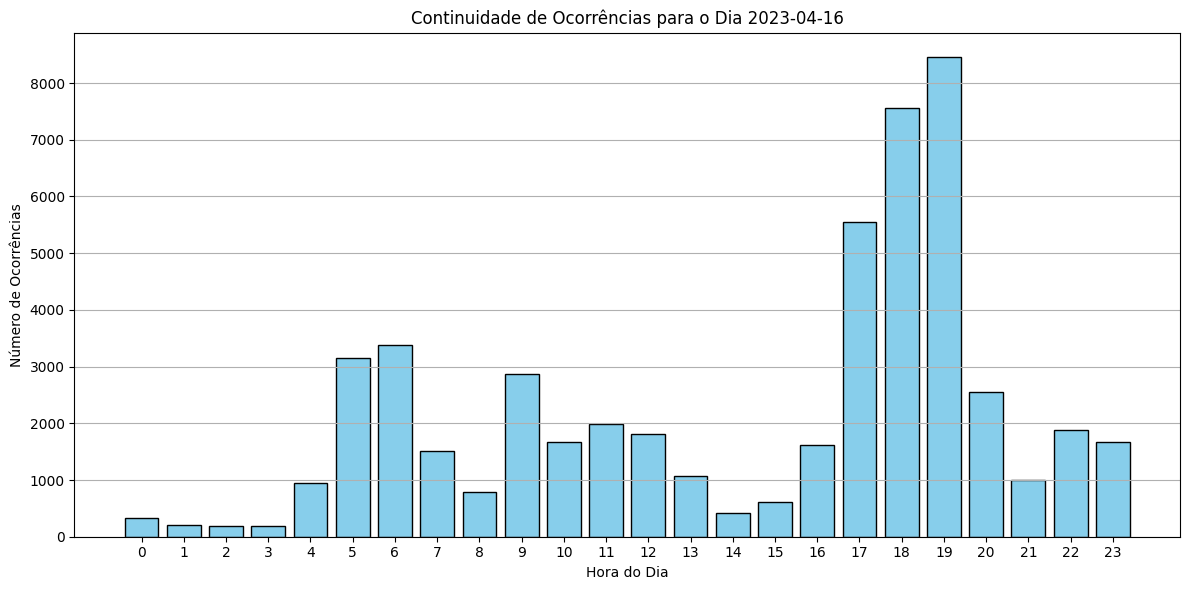

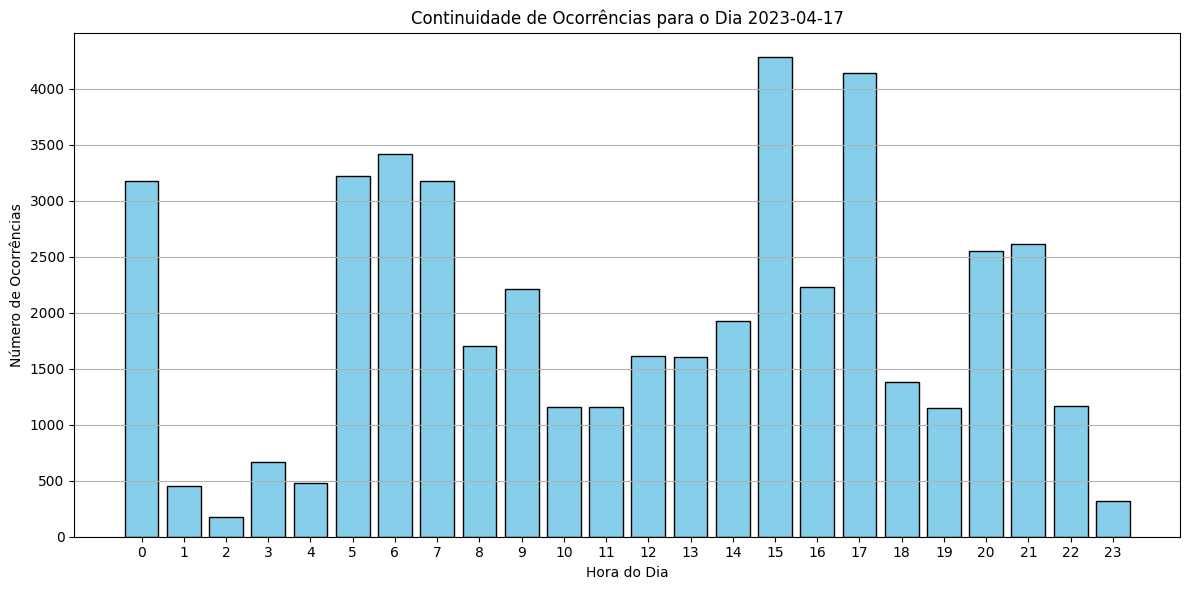

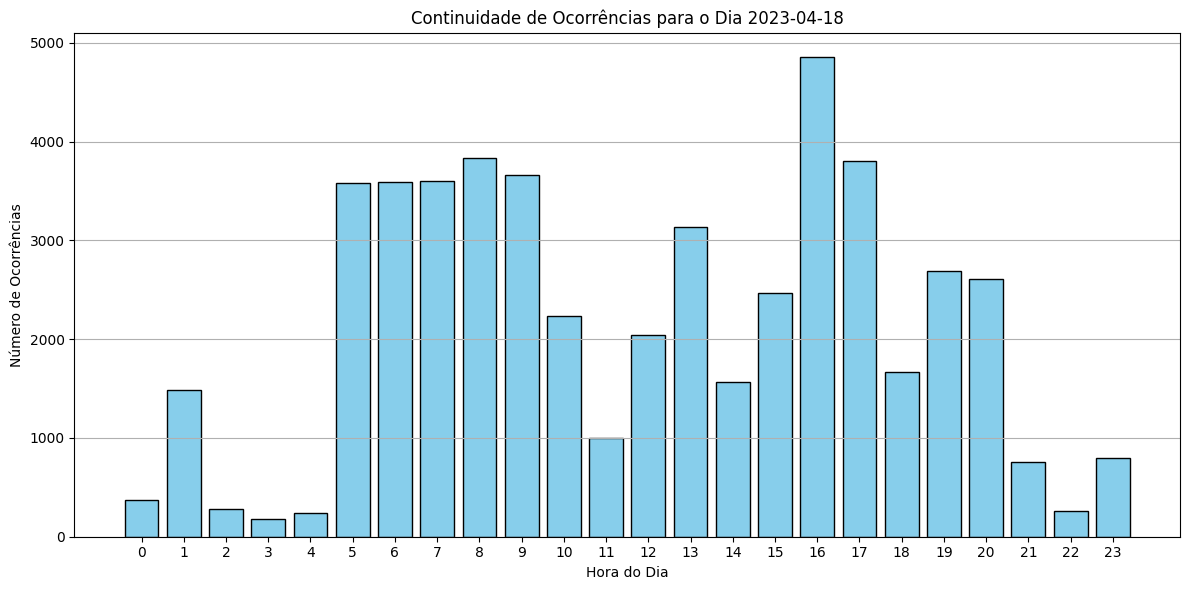

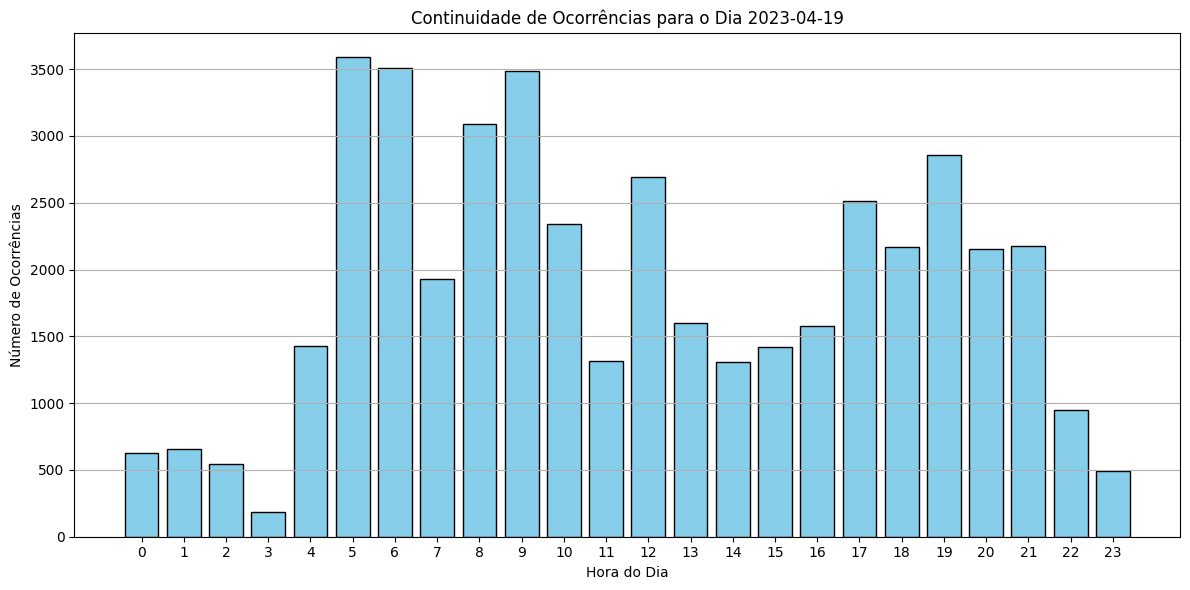

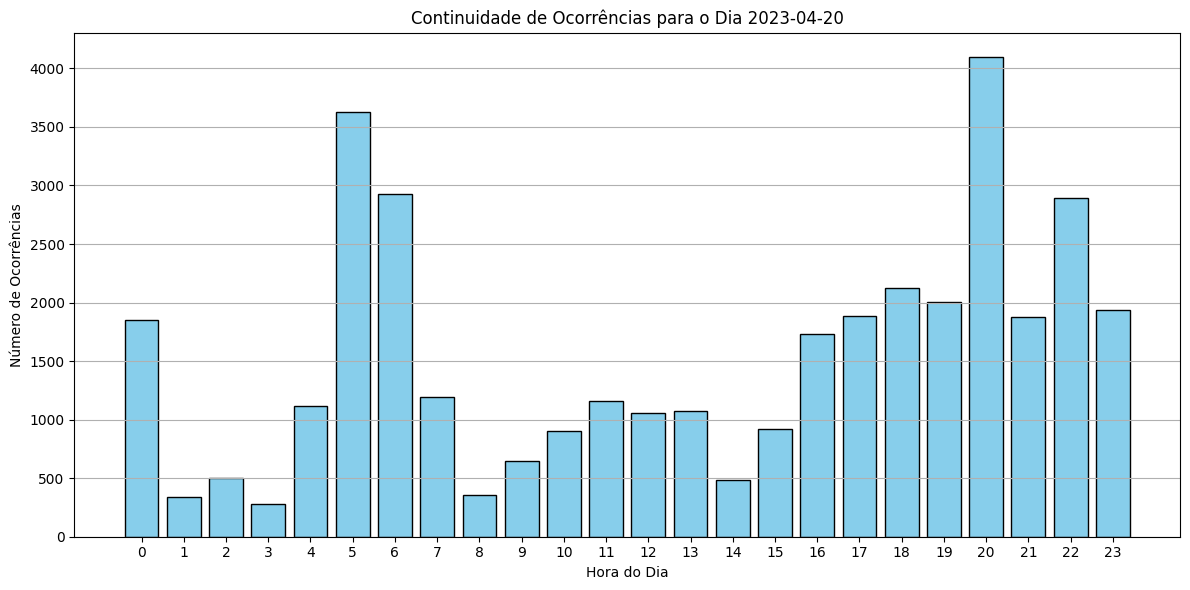

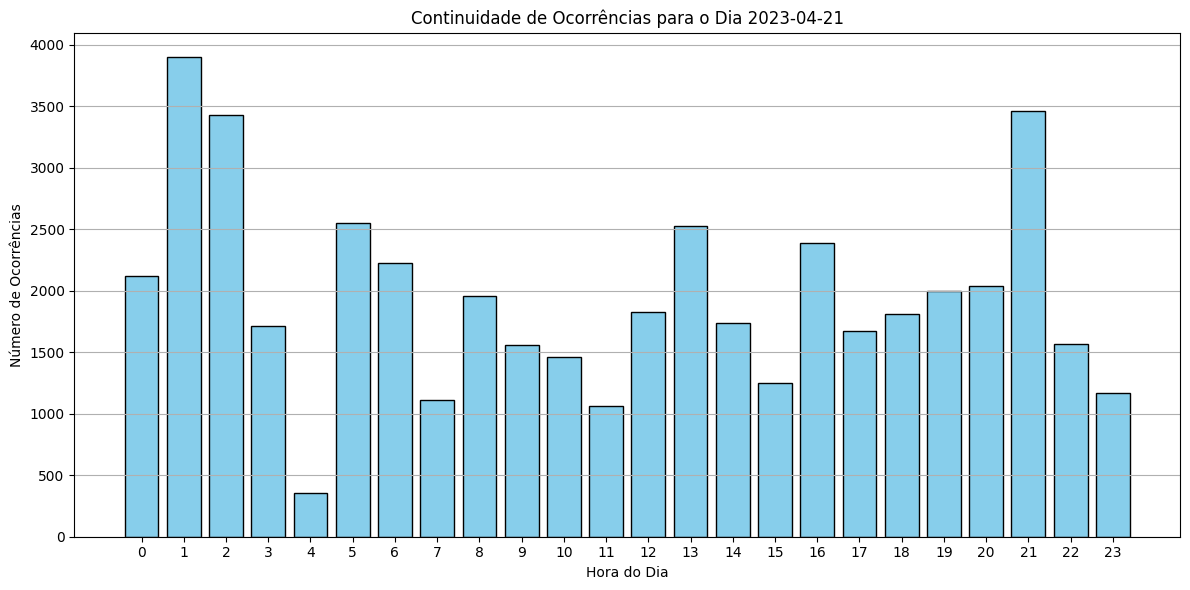

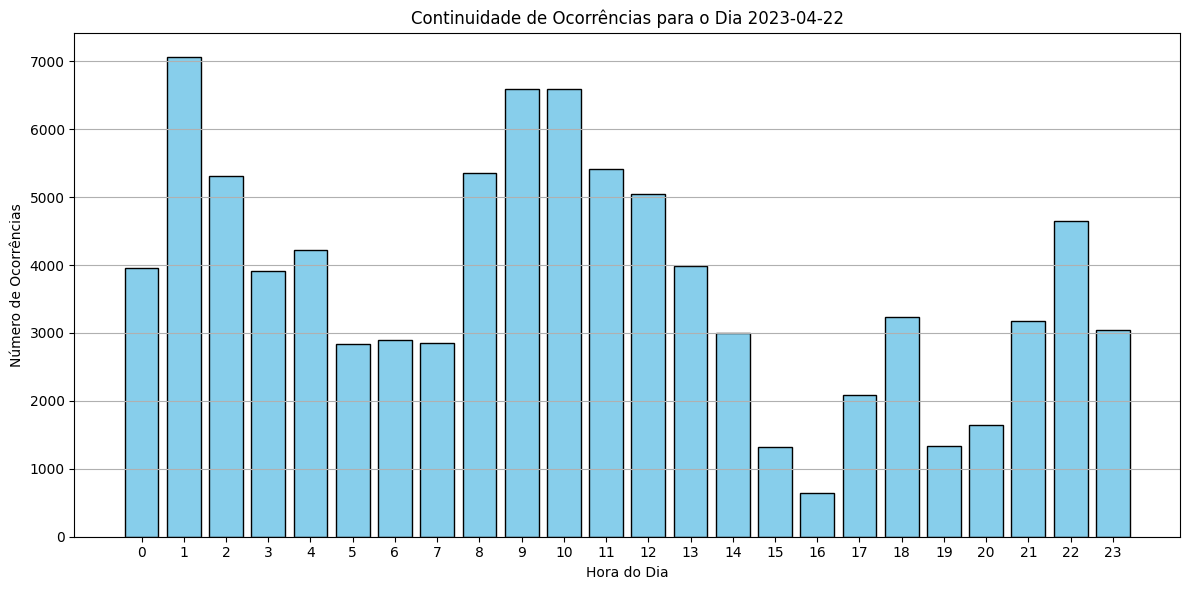

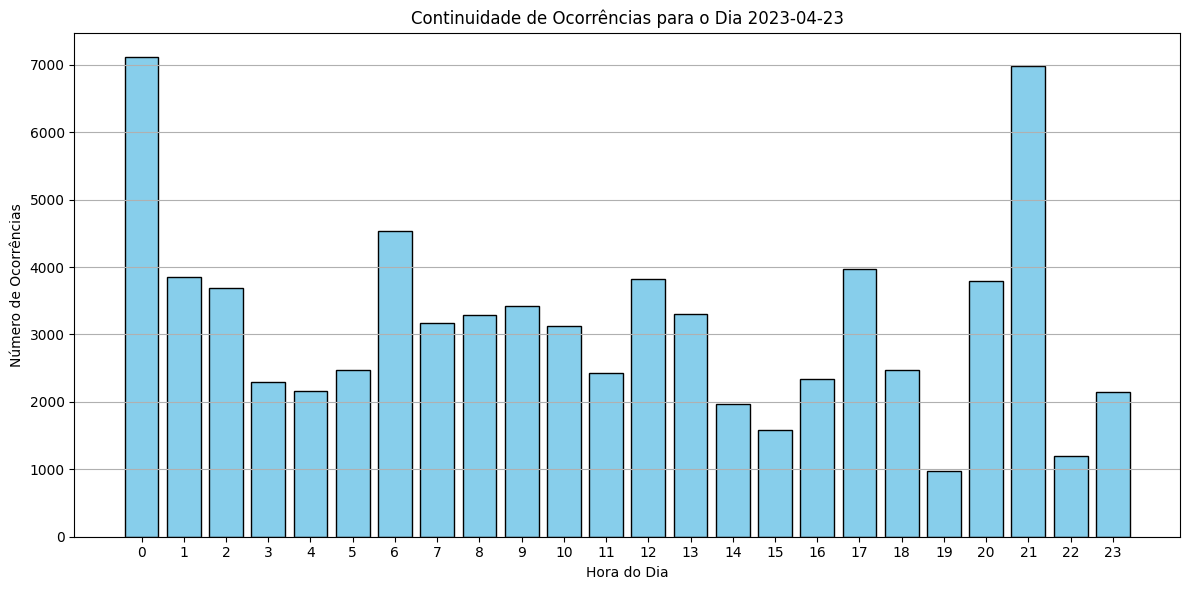

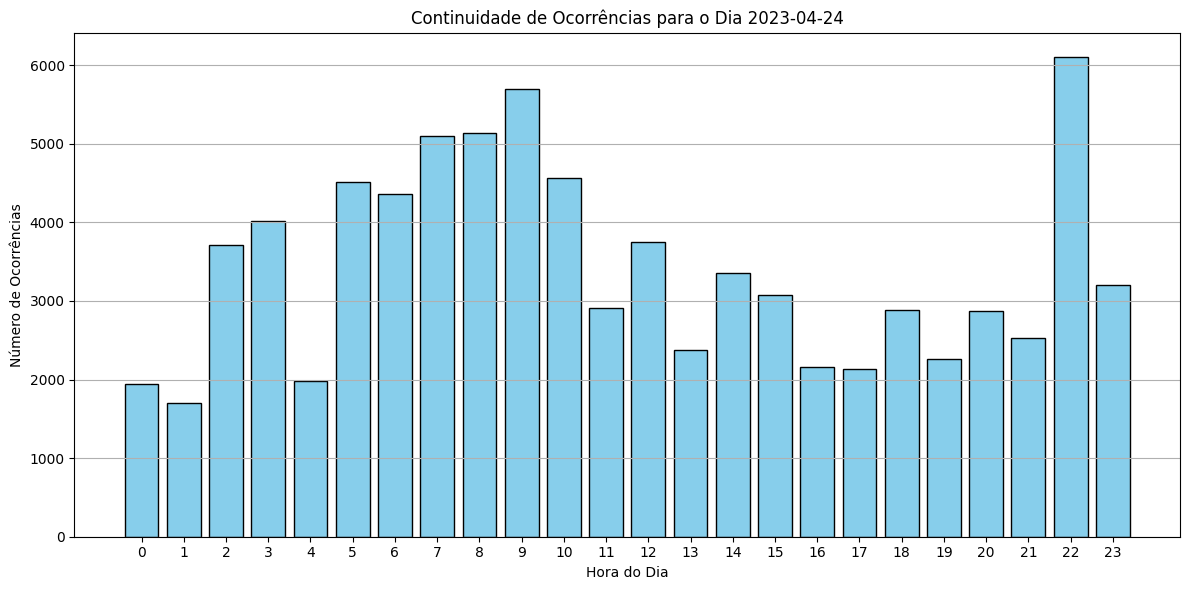

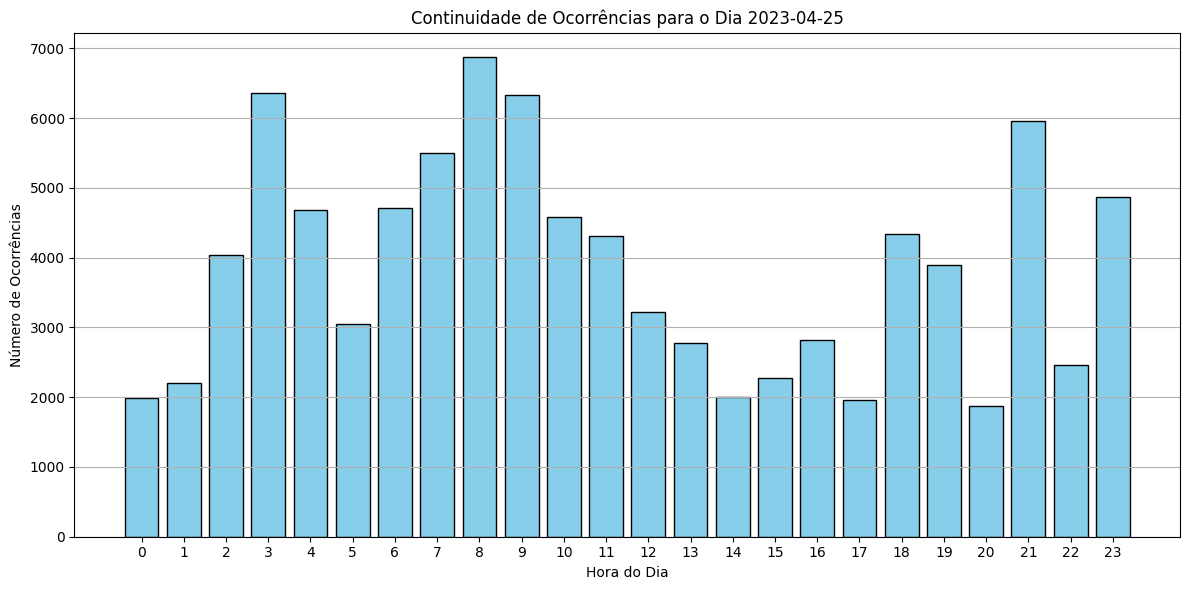

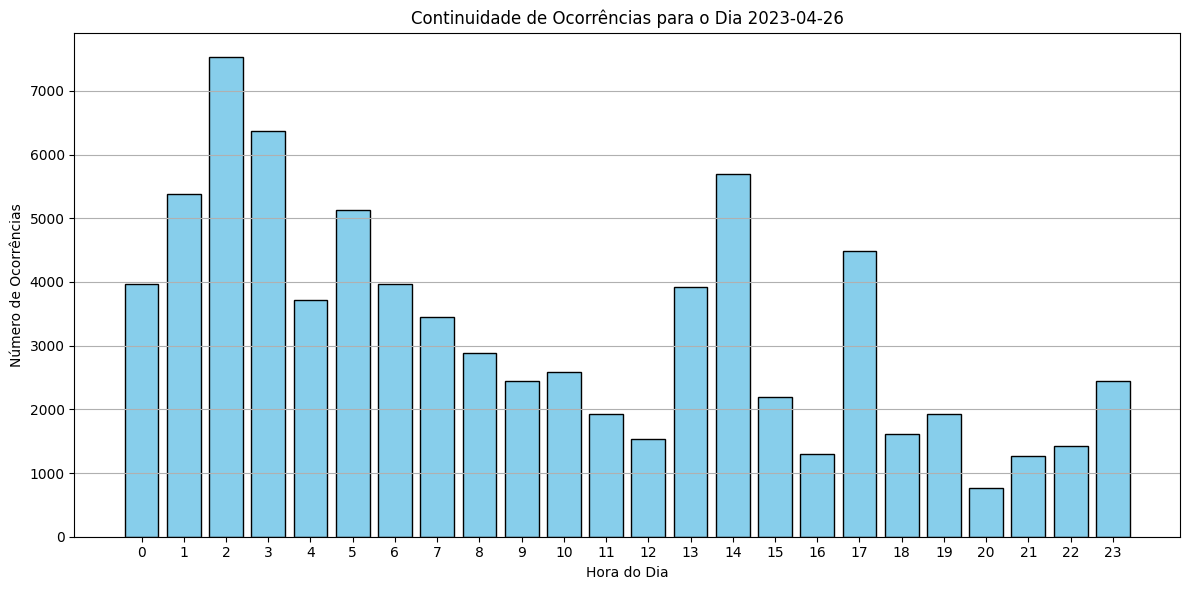

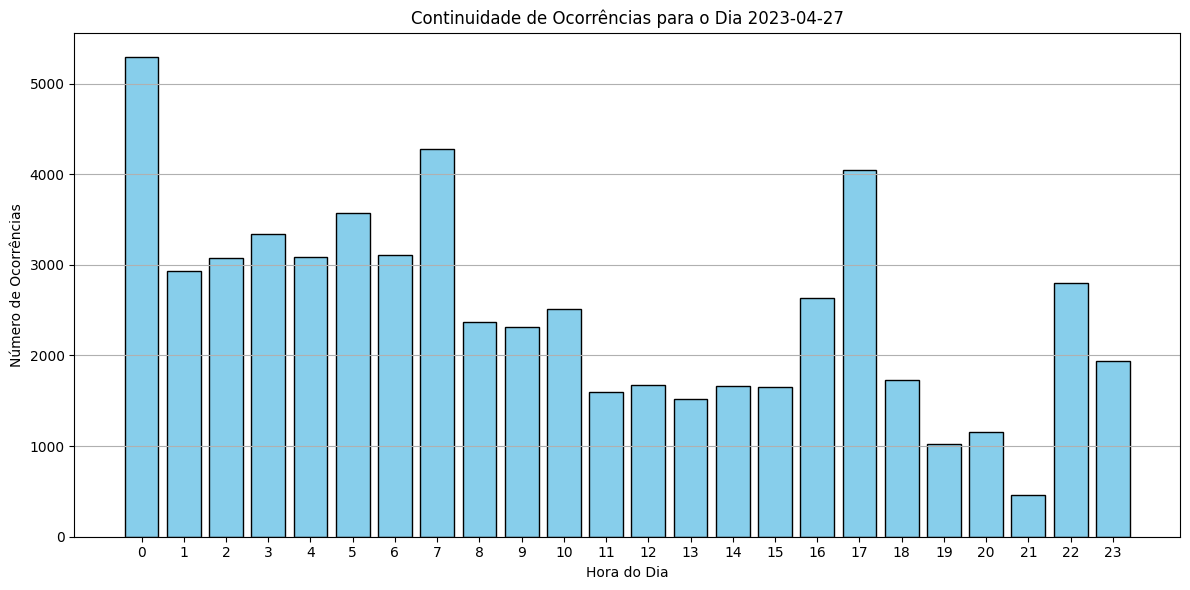

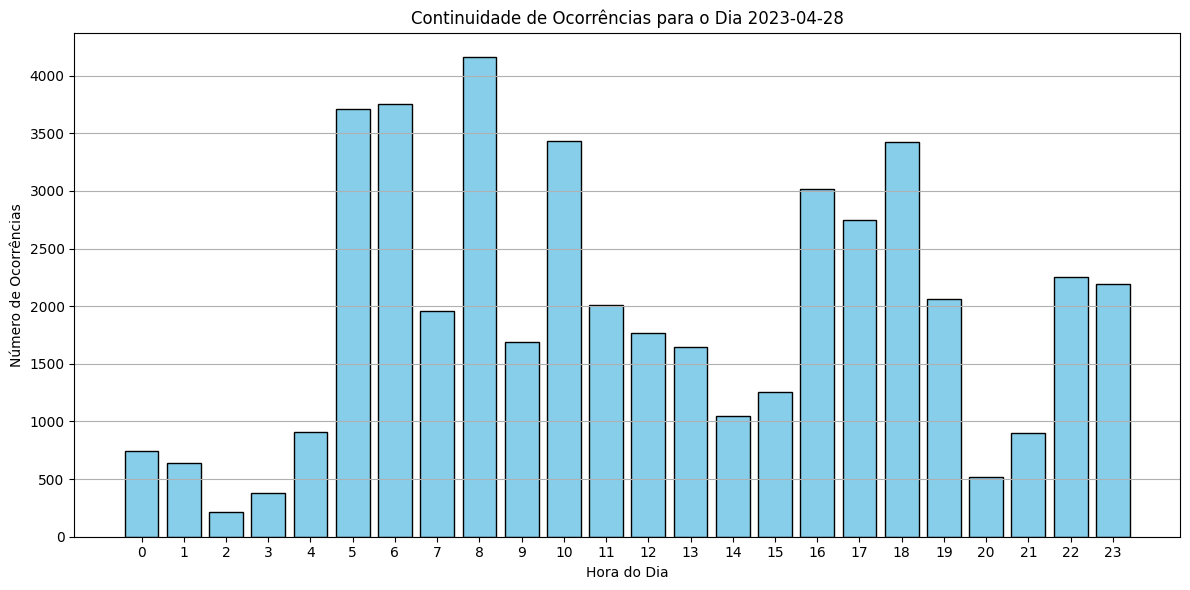

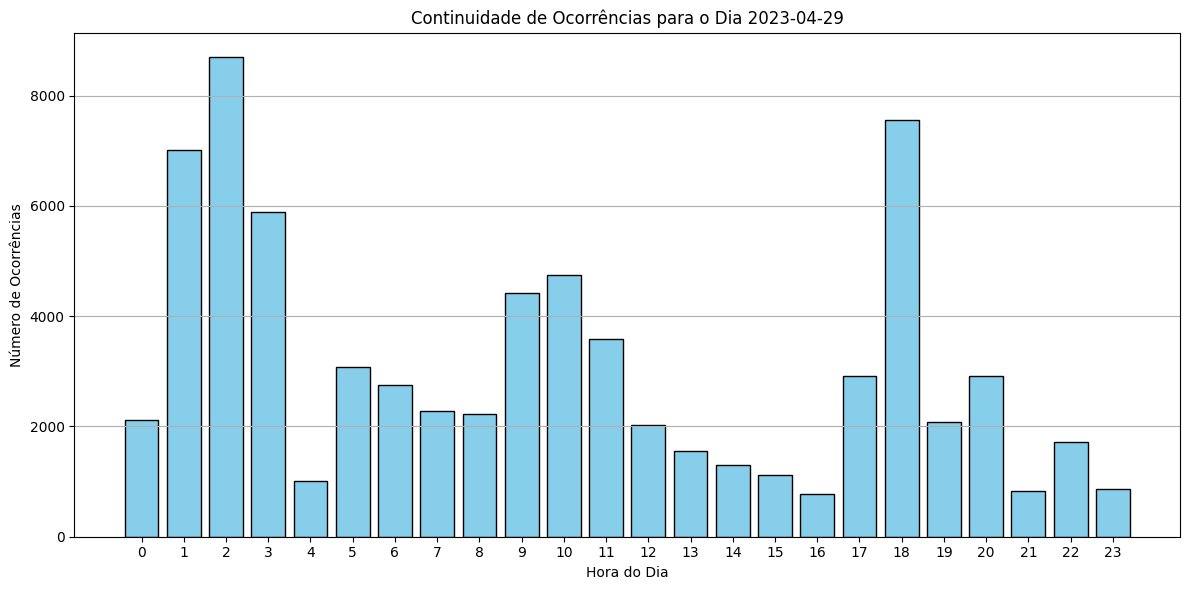

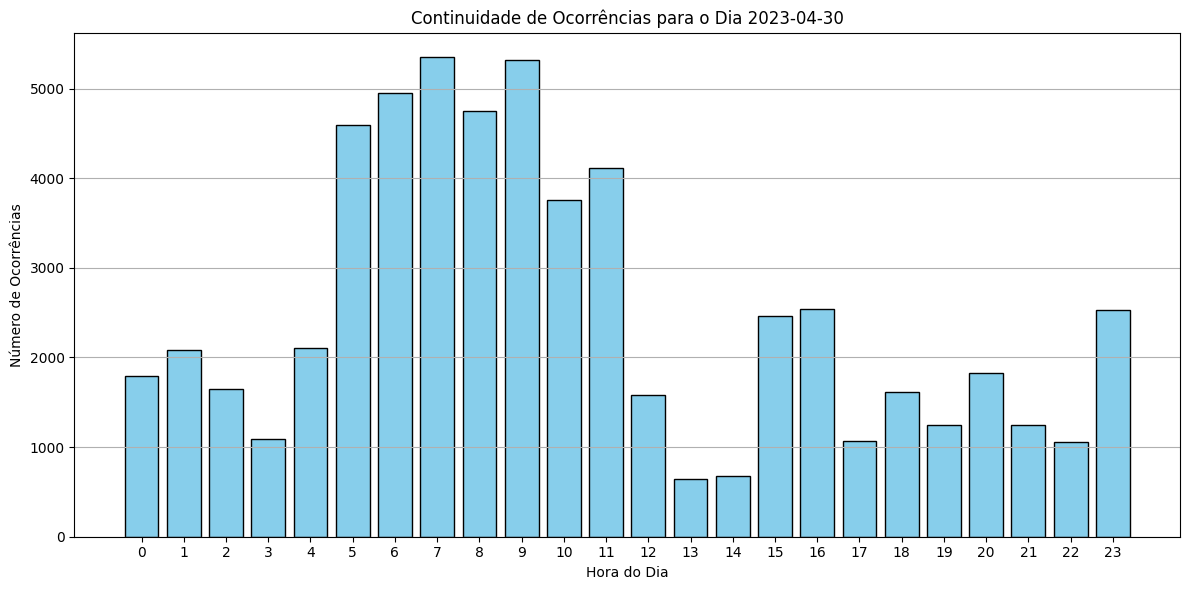

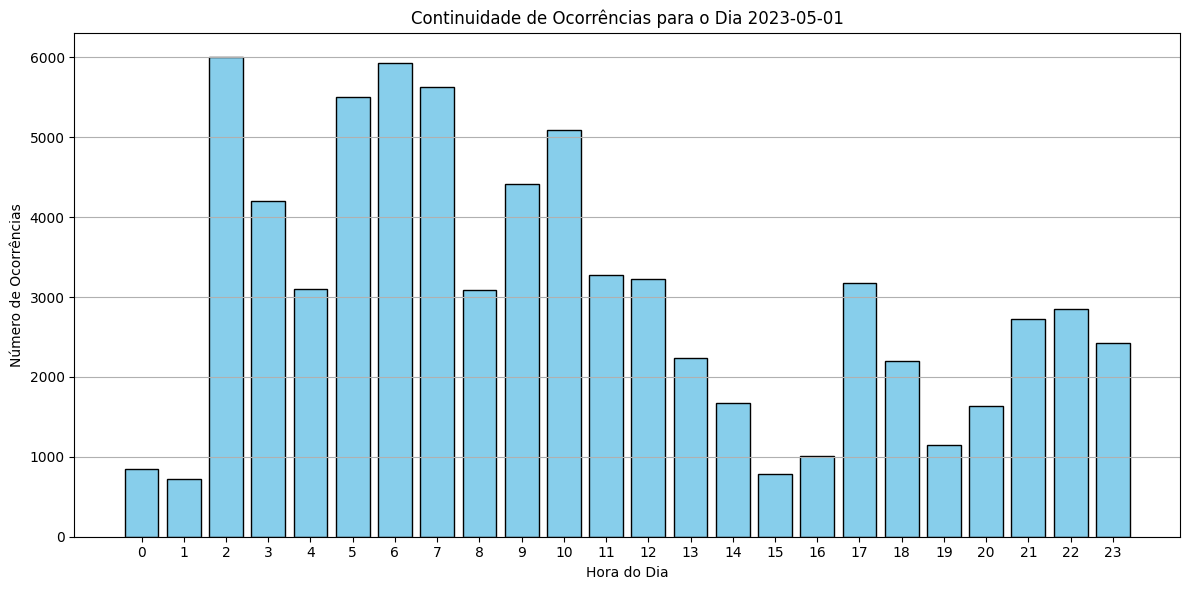

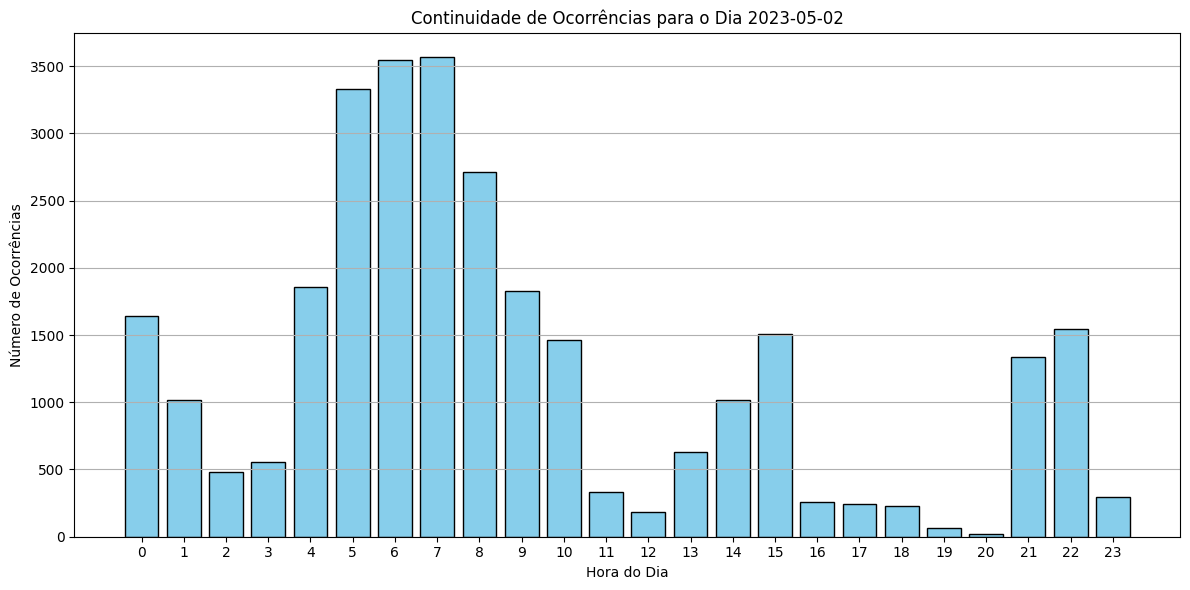

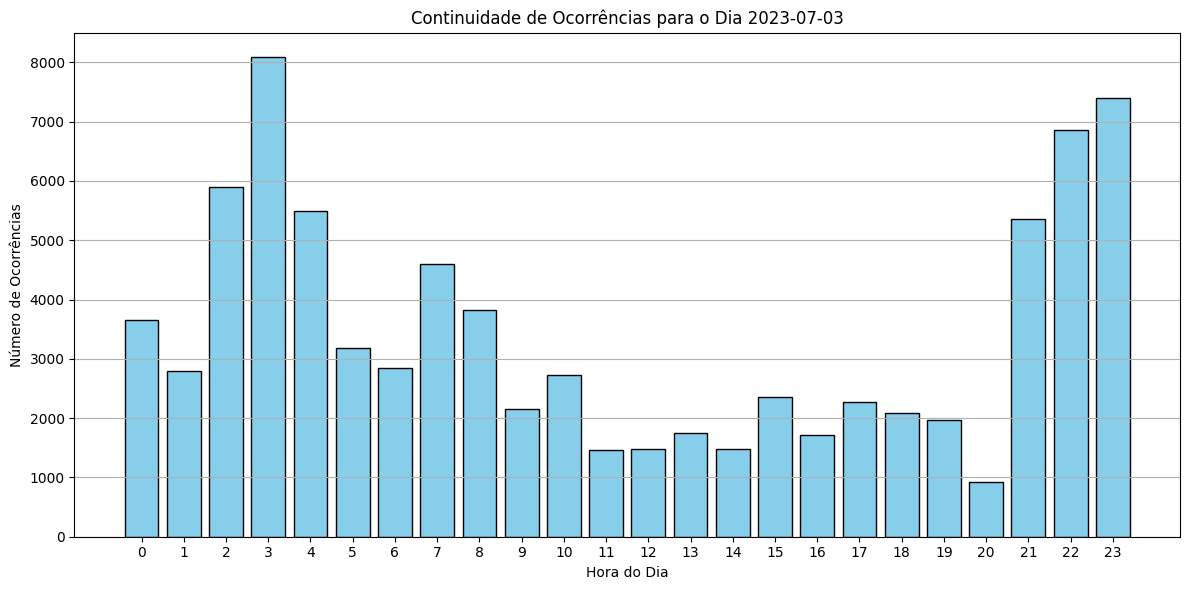

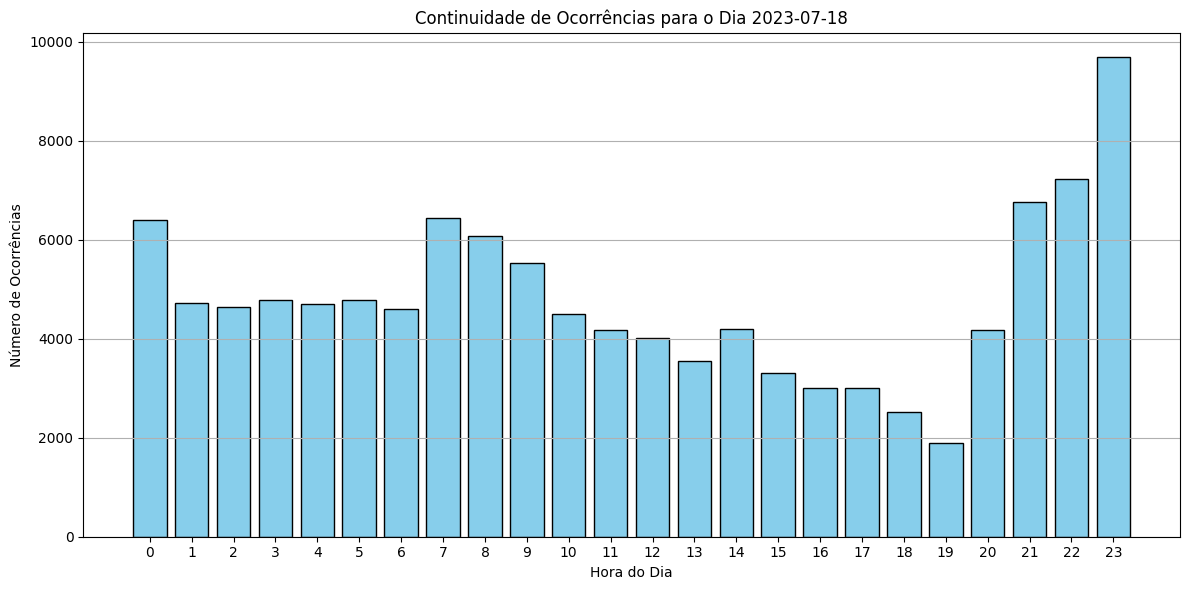

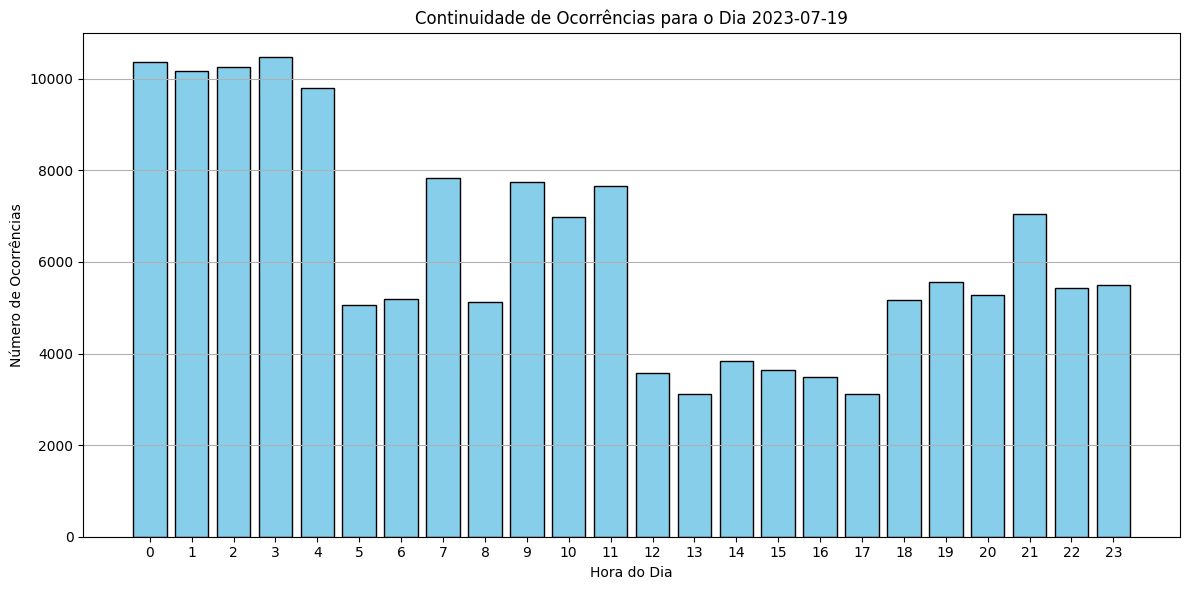

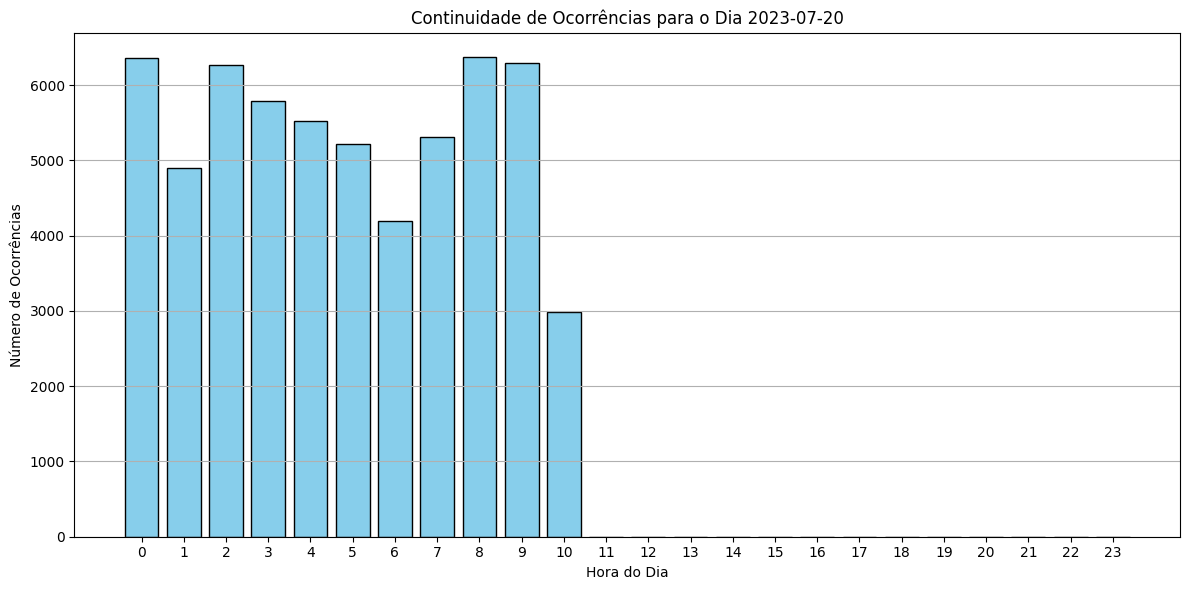

In [6]:
# Counting occurrences of hours
contagem_ocorrencias = df.groupby(["Data", "Hora"]).size().unstack(fill_value=0)

# Plotting occurrences of hours in one day 
for dia in contagem_ocorrencias.index:
    plt.figure(figsize=(12, 6))
    plt.bar(contagem_ocorrencias.columns, contagem_ocorrencias.loc[dia], color='skyblue', edgecolor='black')
    
    plt.title(f'Continuidade de Ocorrências para o Dia {dia}')
    plt.xlabel('Hora do Dia')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(range(24))  # Mostrar todas as horas
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(os.path.join(outputdir, f"continuidade_ocorrencias_{dia}.png"))


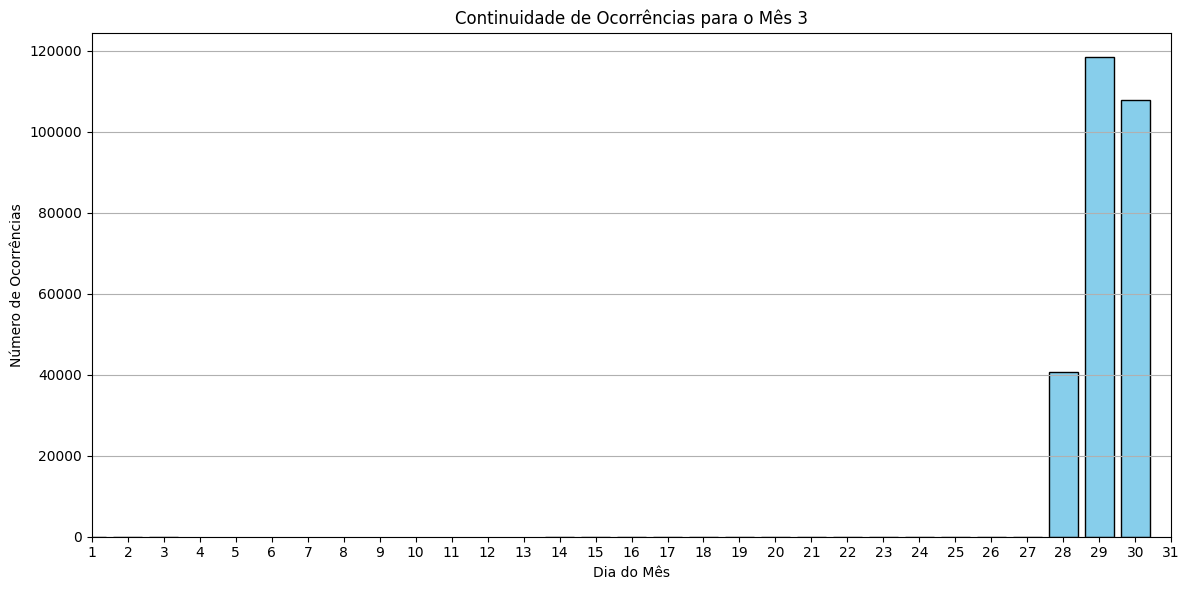

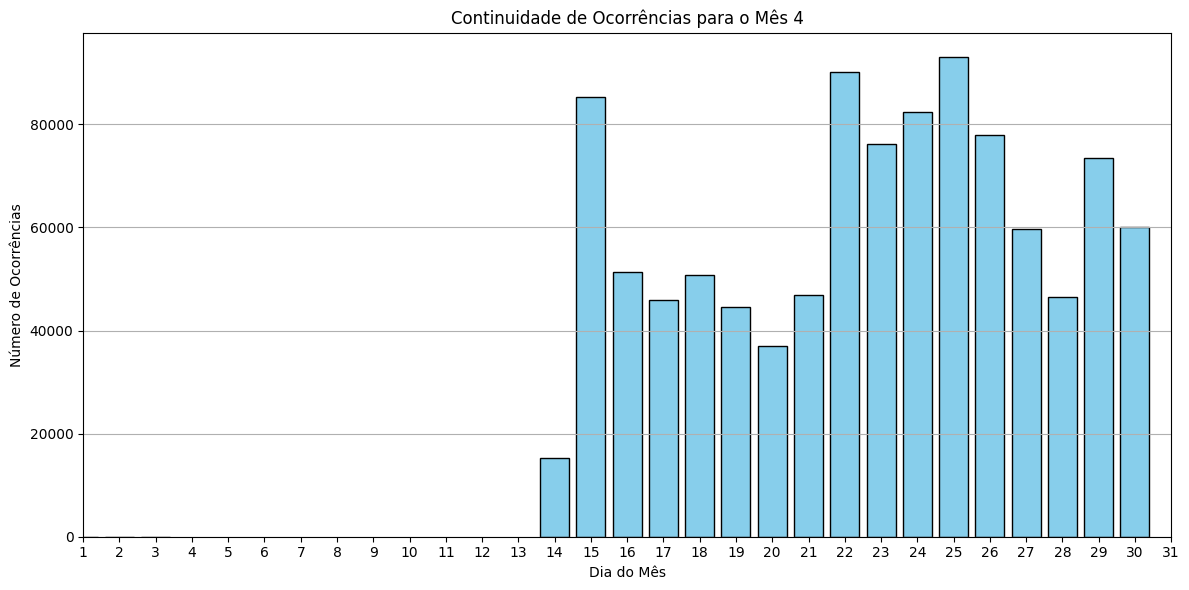

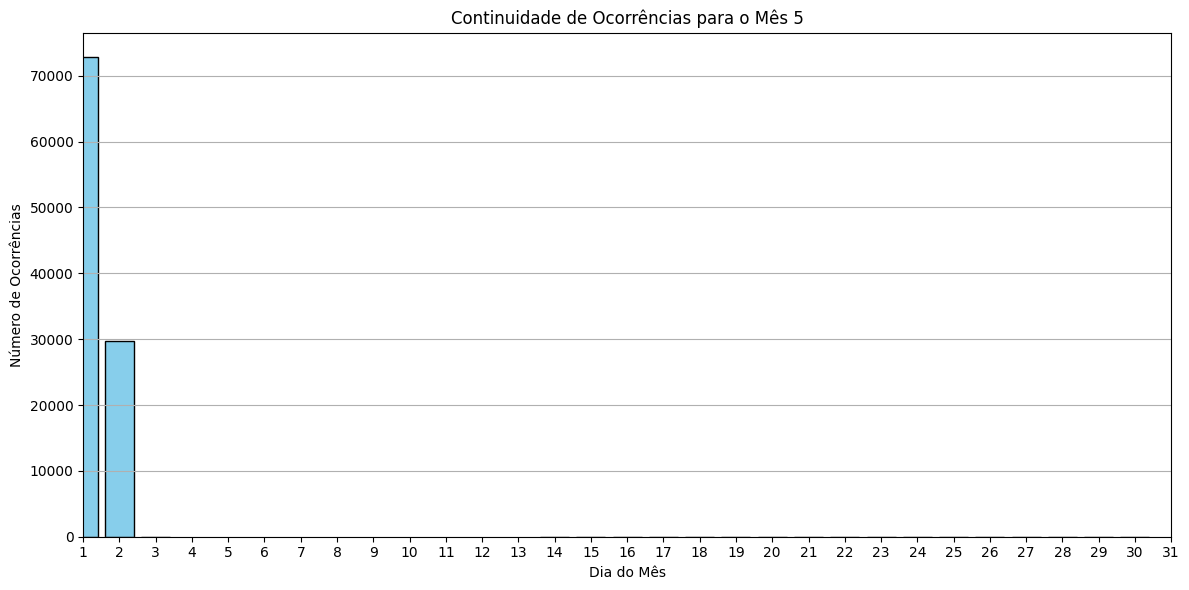

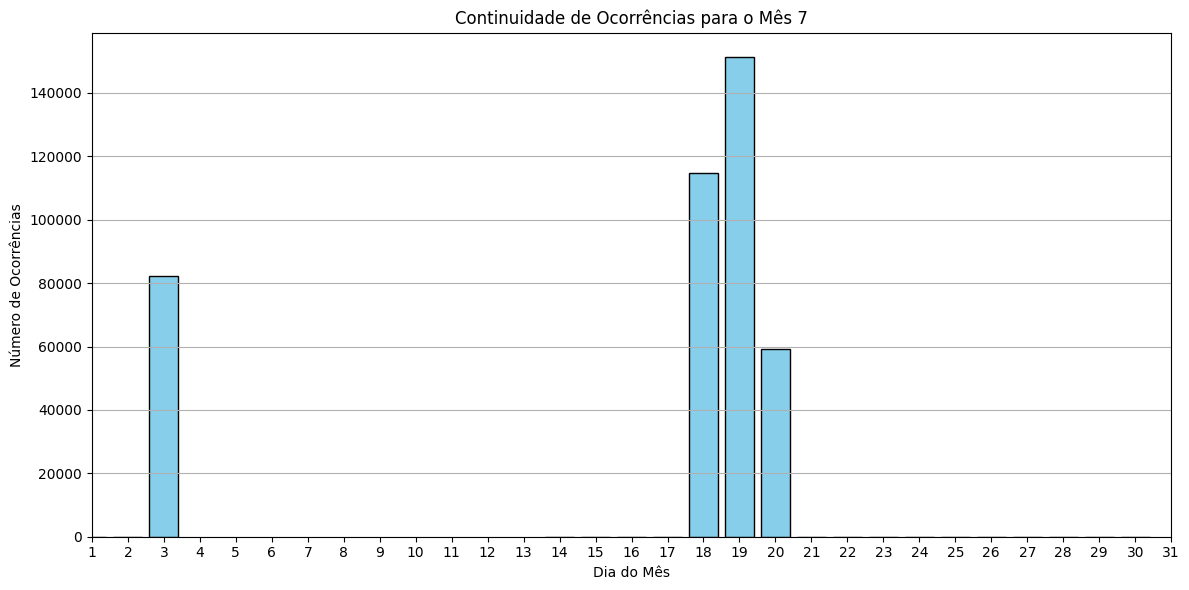

In [7]:
# Counting occurrences of days
contagem_ocorrencias = df.groupby(["Mes", "Dia"]).size().unstack(fill_value=0)

# Plotting occurrences of days in one month
for mes in contagem_ocorrencias.index:
    plt.figure(figsize=(12, 6))
    plt.bar(contagem_ocorrencias.columns, contagem_ocorrencias.loc[mes], color='skyblue', edgecolor='black')
    
    plt.title(f'Continuidade de Ocorrências para o Mês {mes}')
    plt.xlabel('Dia do Mês')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(range(1, 32))  # Mostrar dias de 1 a 31
    plt.xlim(1, 31)  # Ajusta o limite do eixo x
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(os.path.join(outputdir, f"continuidade_ocorrencias_mes_{mes}.png"))


Mes                3       4      5       7
Ano  Channel                               
2023 0         72965  324519  25476  172118
     1        122625  360045  51332  159593
     2         71177  351970  25741   76062


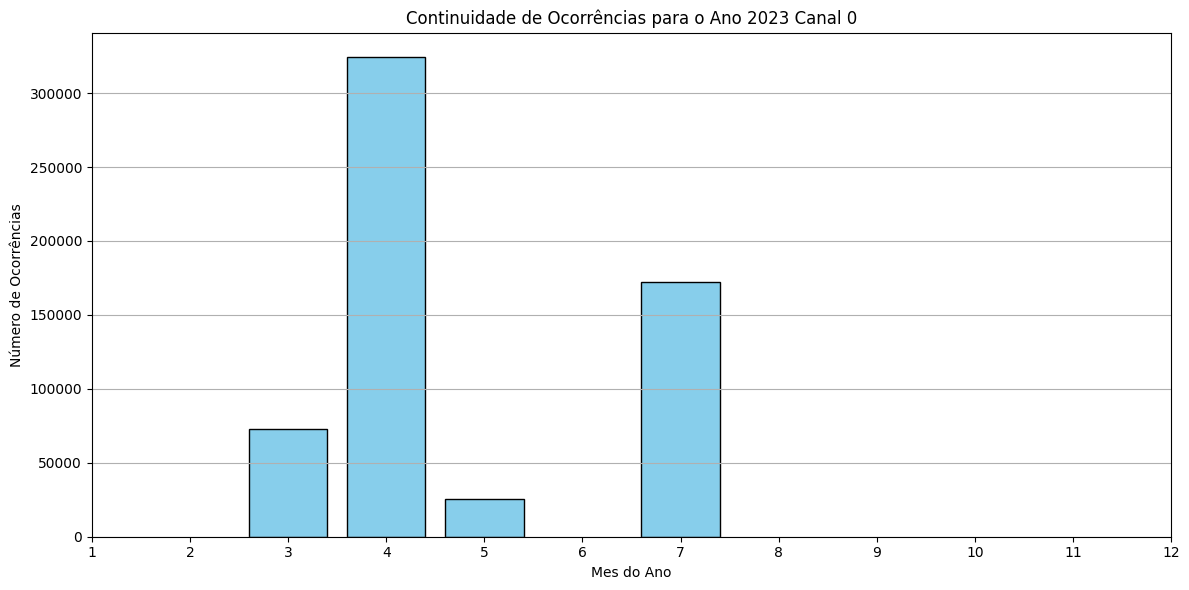

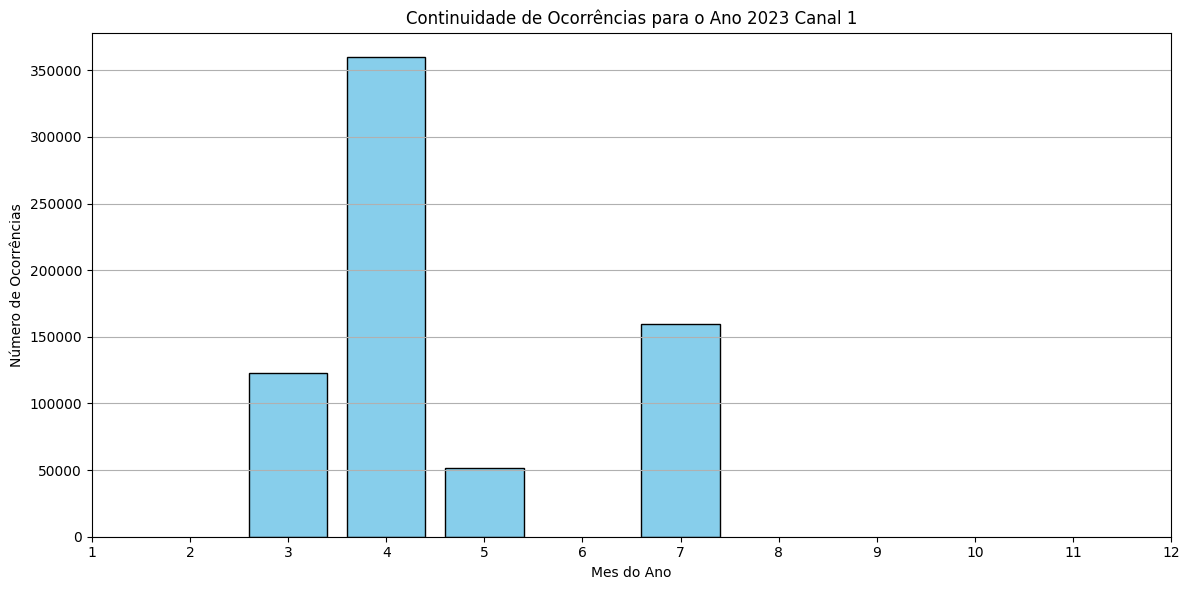

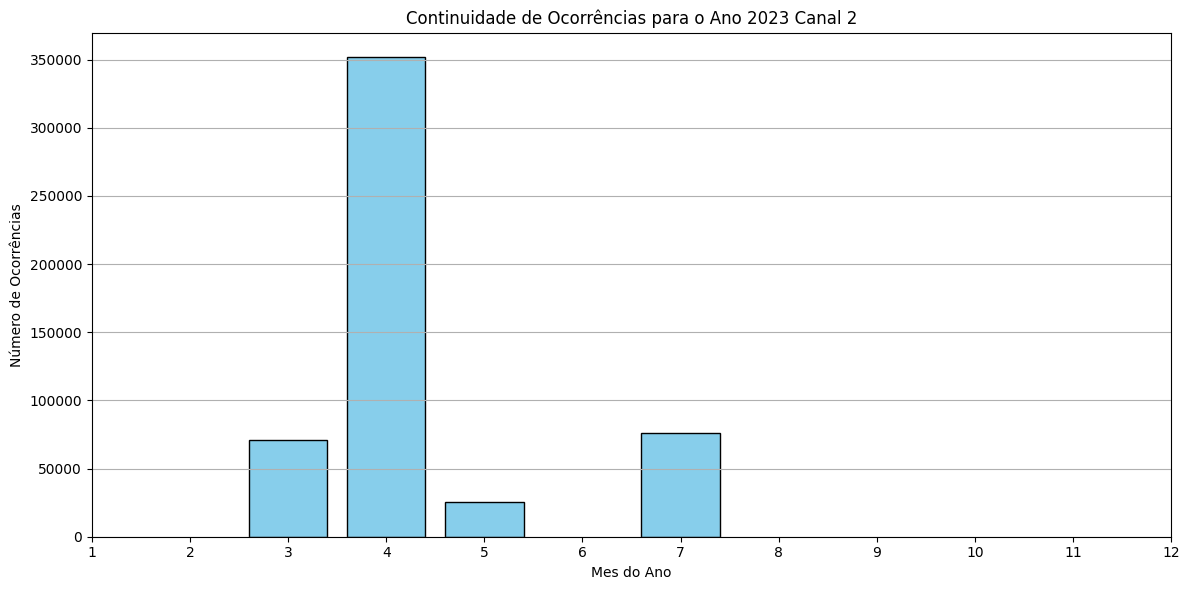

In [16]:
# Counting occurrences of days
contagem_ocorrencias = df.groupby(["Ano", "Channel", "Mes"]).size().unstack(fill_value=0)

print(contagem_ocorrencias)
# Plotting occurrences of days in one month
for ano in contagem_ocorrencias.index:
    plt.figure(figsize=(12, 6))
    plt.bar(contagem_ocorrencias.columns, contagem_ocorrencias.loc[ano], color='skyblue', edgecolor='black')
    
    plt.title(f'Continuidade de Ocorrências para o Ano {ano[0]} Canal {ano[1]}')
    plt.xlabel('Mes do Ano')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(range(1, 13))  # Mostrar dias de 1 a 31
    plt.xlim(1, 12)  # Ajusta o limite do eixo x
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(os.path.join(outputdir, f"continuidade_ocorrencias_ano_{ano[0]}_channel{ano[1]}.png"))
